In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

/Users/seongjuhyeon/workspace/tensorflowZeroToAll/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
tf.set_random_seed(777)

In [3]:
#import train set
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# To solve downloading files.
## https://github.com/tensorflow/tensorflow/issues/10779
## run the /Applications/Python 3.6/Install Certificates.command bash script to install newer certs.
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)
print(mnist.train.num_examples)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
55000


In [5]:
# 0 ~ 9까지의 숫자 갯수
nb_classes = 10

In [6]:
# MNIST Data image of shape = 28 * 28 = 784
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes]) # one-hot으로 주어짐.

In [7]:
with tf.name_scope("layer") as scope:
    # Variable
    W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
    b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

    W_hist = tf.summary.histogram("weights", W)
    b_hist = tf.summary.histogram("biases", b)
    
    # hypothesis
    logits = tf.matmul(X, W) + b
    hypothesis = tf.nn.softmax(logits)

    hypothesis_hist = tf.summary.histogram("hypothesises", hypothesis)

In [8]:
# Cost
with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
    
    # scalar = 1개의 값이 나와야 할 때 사용
    cost_summary = tf.summary.scalar("cost", cost)

In [15]:
# minimize cost
with tf.name_scope("train") as scope:
    train = tf.train.GradientDescentOptimizer(learning_rate=1).minimize(cost)

In [16]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

accuracy_summary = tf.summary.scalar("accuracy", accuracy)

In [17]:
# Slice the data, epochs, batch_size
training_epochs = 15
batch_size = 100
total_iterator = int(mnist.train.num_examples / batch_size)
print(mnist.train.num_examples)
print(total_iterator)

55000
550


In [18]:
# Prepare session
session = tf.Session()
session.run(tf.global_variables_initializer())

In [19]:
# tensorboard --logdir=./logs/xor_logs
# http://localhost:6006/
merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("../logs/lab09/6-2-mnist-with-learning-rate-1")
writer.add_graph(session.graph)  # Show the graph

In [20]:
# Fit the train
for epoch in range(training_epochs):
    avg_cost = 0
    
    total_iterator = int(mnist.train.num_examples / batch_size)
    for step in range(total_iterator):
        batch_x_train, batch_y_train = mnist.train.next_batch(batch_size)
        summary, cost_val, _ = session.run([merged_summary, cost, train],
                                           feed_dict={X: batch_x_train, Y: batch_y_train})

        writer.add_summary(summary, global_step=step)
        
        avg_cost += cost_val / batch_size
    
    print("Epoch:", "%04d" % (epoch + 1), ", Cost:", "{:.5f}".format(avg_cost))
    
print("Accuracy:", session.run(accuracy,
                               feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 , Cost: 5.46909
Epoch: 0002 , Cost: 2.83044
Epoch: 0003 , Cost: 2.44061
Epoch: 0004 , Cost: 2.22986
Epoch: 0005 , Cost: 2.07688
Epoch: 0006 , Cost: 1.98848
Epoch: 0007 , Cost: 1.91906
Epoch: 0008 , Cost: 1.85894
Epoch: 0009 , Cost: 1.81576
Epoch: 0010 , Cost: 1.78054
Epoch: 0011 , Cost: 1.74346
Epoch: 0012 , Cost: 1.70859
Epoch: 0013 , Cost: 1.68942
Epoch: 0014 , Cost: 1.66712
Epoch: 0015 , Cost: 1.65965
Accuracy: 0.98317


8596
Label:  [9]
Prediction:  [9]


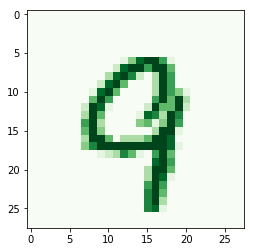

In [27]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print(r)
print("Label: ", session.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))

sample_image = mnist.test.images[r: r+1]
print("Prediction: ", session.run(tf.argmax(hypothesis, 1),
                                  feed_dict={X: sample_image}))

plt.imshow(
    sample_image.reshape(28, 28),
    cmap='Greens',
    interpolation='nearest')
plt.show()